# MNIST Classifier

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load training data from MNIST Dataset

# x = images, y = labels
x, y = torch.load('C:\\Users\\Razer Blade\\Desktop\\mnist_classifier\\MNIST\\processed\\training.pt')
#print(x.size())

In [11]:
# take a look at x, a tensor
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [9]:
y #y, also a tensor

tensor([5, 0, 4,  ..., 5, 6, 8])

In [12]:
print(x.shape) # 60000 28x28 pixel images. Each pixel is an element
print(y.shape) # 1D tensor, 60000 labels for our images.

torch.Size([60000, 28, 28])
torch.Size([60000])


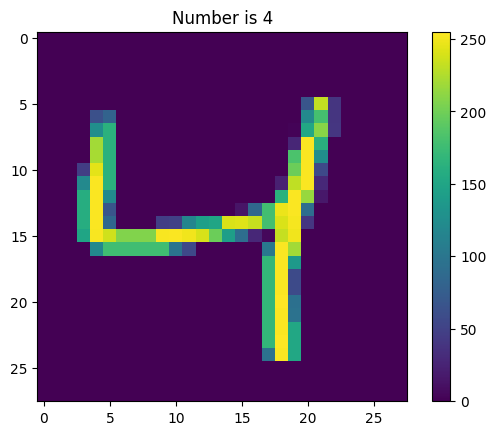

In [17]:
# plot x, y
# x is a tensor, convert torch tensor --> numpy array

# you can access individual images by accessing indices 0-59999, but these are tensors so conver to np
plt.imshow(x[2].numpy())

# each image label in y should also be converted to np

# y[2] = tensor(4), tensor(4).numpy() = array[4]
plt.title('Number is {}'.format(y[2].numpy()))
plt.colorbar()
plt.show()

### One Hot Encoder

In [18]:
# Converts number labels into unit vectors pointing in different directions, making it easier to use with the loss function
# one_hot function from F

# 10 classes, one per digit. 
y_new = F.one_hot(y, num_classes=10)

In [24]:
print("y_new shape: ", y_new.shape)
print("y_old shape: ", y.shape)
print("y_new: ", y_new)
print("y_old: ", y)

y_new shape:  torch.Size([60000, 10])
y_old shape:  torch.Size([60000])
y_new:  tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])
y_old:  tensor([5, 0, 4,  ..., 5, 6, 8])


### Image Flattening/Processing

In [26]:
# convert 28x28 images to vectors
# let pytorch do the work by passing in -1 as the first element. 
x.view(-1, 28**2)
print(x.shape)

torch.Size([60000, 28, 28])


### Dataset & DataLoader

In [58]:
# inherit from Dataset()
class CTDataset(Dataset):
    def __init__(self, filepath):
        # x = image, y = label
        self.x, self.y = torch.load(filepath)
        # normalize, data in [0, 1]
        self.x = self.x / 255. # float
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        # the number of images in the dataset, 60000
        return self.x.shape[0]
    def __getitem__(self, ix):
        # allows for tensor indexing
        return self.x[ix], self.y[ix]

In [63]:
# load datasets
train_ds = CTDataset('C:\\Users\\Razer Blade\\Desktop\\mnist_classifier\\MNIST\\processed\\training.pt')
test_ds = CTDataset('C:\\Users\\Razer Blade\\Desktop\\mnist_classifier\\MNIST\\processed\\test.pt')

In [64]:
train_dl = DataLoader(train_ds, batch_size=5)
test_dl = DataLoader(train_dl, batch_size=5)

### Neural Network

In [51]:
# Use Cross Entropy Loss function 
L = nn.CrossEntropyLoss()

In [52]:
# must inherit from nn.Module
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # each subsequent layer takes last layer's output size as input.
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    
    def forward(self, x):
        """ x = 28x28 image """
        # must first flatten to a 28^2 vector. -1 input maintains the batch size 
        x = x.view(-1, 28**2)
        # feed into each matrix in the neural network
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [53]:
f = MyNeuralNet()

Pre-Training Results

In [54]:
# get first 4 elements of the dataset. 
xs = x[0:4].float()
#print(first_four)
print(first_four.shape)
print(xs.dtype)

torch.Size([4, 28, 28])
torch.float32


In [55]:
# actual values/labels: 
ys = y[0:4]
print(ys)

tensor([5, 0, 4, 1])


In [56]:
# pass into model
f(xs)

tensor([[-17.8643,   2.8391, -12.6639,  -4.8291,  15.2889,  13.8936,  16.6833,
         -15.2203,  13.7400,  19.1325],
        [ -5.7644,  -5.2509,  -9.6034,   0.9918,  11.7144,   6.6510,  17.4293,
         -25.1210,   5.1987,   6.8755],
        [ -9.8631,  -1.5324,  -6.5008, -11.6937,  18.9906,  12.6783,   6.7490,
         -12.1306,   2.8592,  -3.8855],
        [-18.9772,   5.2443,   1.7568,   2.1779,  15.8880,   6.3850,   3.7430,
         -13.9399,   3.8283,   8.0442]], grad_fn=<SqueezeBackward0>)

In [57]:
# compute loss AKA y-hat, use cross entropy loss function

# lower value --> higher accuracy
L(f(xs), ys)

tensor(9.7983, grad_fn=<NllLossBackward0>)

### Training Loop

In [62]:
# parameters = [dataloader, neural network, epochs]
def train_model(dl, f, num_epochs=20):
    # maybe define device to train on cuda rather than CPU??
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    f = f.to(device)

    # hyperparameters
    learning_rate = 0.01

    # loss (cross entropy) and optimizer (SGD)
    L = nn.CrossEntropyLoss()
    optimizer = SGD(f.parameters(), lr=learning_rate)

    losses = []
    epochs = []
    
    for epoch in range(num_epochs):
        print("Epoch number {}".format(epoch))

        N = len(dl)
        # loops through each batch, based on defined batch size.
        for i, (x, y) in enumerate(dl):
            # forward pass and loss calculation
            x = x.to(device)
            y = y.to(device)
            forward = f(x)
            loss = L(forward, y)

            # back prop
            loss.backward()

            # update weights and clear .grad
            optimizer.step()
            optimizer.zero_grad()

            # store training data
            epochs.append(epoch * i/N)
            losses.append(loss.item())
    
    return np.array(epochs), np.array(losses)

Train the model

In [65]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch number 0
Epoch number 1
Epoch number 2
Epoch number 3
Epoch number 4
Epoch number 5
Epoch number 6
Epoch number 7
Epoch number 8
Epoch number 9
Epoch number 10
Epoch number 11
Epoch number 12
Epoch number 13
Epoch number 14
Epoch number 15
Epoch number 16
Epoch number 17
Epoch number 18
Epoch number 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

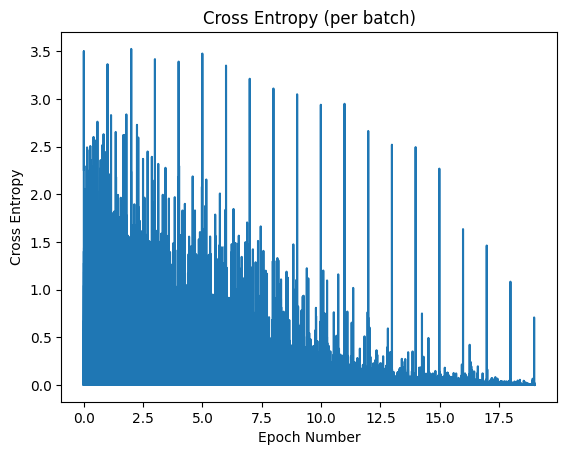

In [68]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

### Train on Test Data

In [114]:
# test on unseen data to check for overfitting

# grab first 2000 images
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xs, ys = test_ds[:2000]
xs_gpu = xs.to(device)
ys_gpu = ys.to(device)
yhats = f(xs_gpu).argmax(axis=1)

# print(ys)
# print(yhats)

x_original, y_original = torch.load('C:\\Users\\Razer Blade\\Desktop\\mnist_classifier\\MNIST\\processed\\test.pt')


y_original = y_original.numpy()
yhats_np = yhats.cpu().numpy()

# full set
xs_full, ys_full = test_ds[:10000]
yhats_full_set = f(xs_full.to(device)).argmax(axis=1)
yhats_np = yhats_full_set.cpu().numpy()

# print(y_original)
# print(yhats_np)


#print(yhats)

Model is 97.78 percent correct.


In [115]:
# calculate accuracy
def accuracy(y, yhats):
    num_correct = 0
    for i in range(len(y)):
        if y[i] == yhats[i]:
            num_correct += 1
    
    acc = num_correct/len(y) * 100
    message = "Model is {} percent correct.".format(acc)
    return message

print(accuracy(y_original, yhats_np))

Model is 97.78 percent correct.


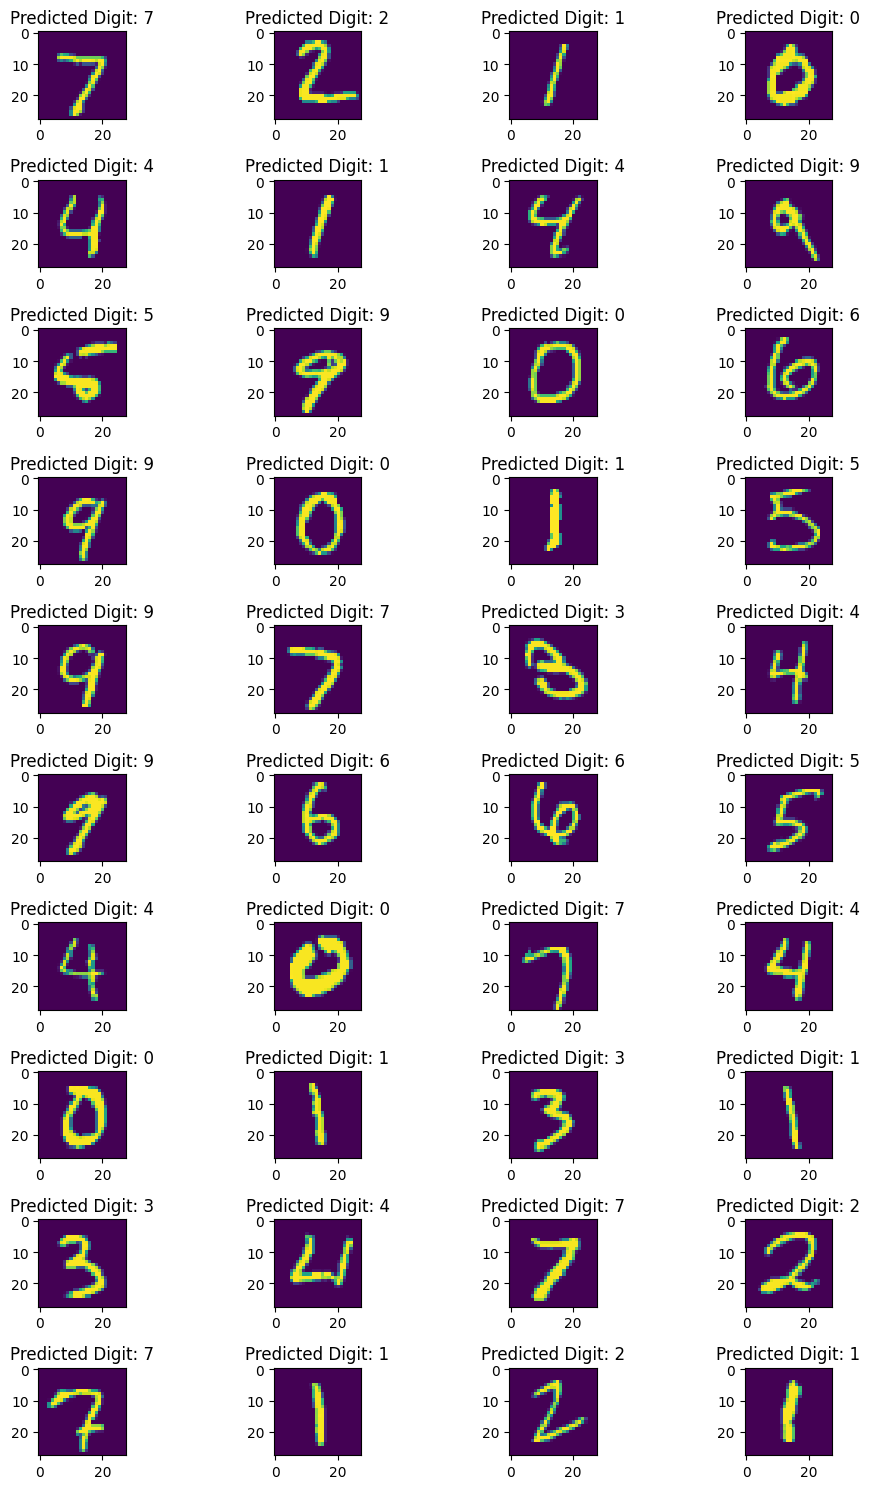

In [116]:
# plot yhats
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')

fig.tight_layout()
plt.show()